# INDICE
1. Introduccion

In [654]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Información básica de la tabla

In [655]:
melbourne_dataset = pd.read_csv("Melbourne_housing_full.csv")
melbourne_dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [656]:
melbourne_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [657]:
melbourne_dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [658]:
melbourne_dataset['Type'].value_counts()

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64

In [659]:
melbourne_dataset['Method'].value_counts()

Method
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64

In [660]:
melbourne_dataset['SellerG'].value_counts()

SellerG
Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: count, Length: 388, dtype: int64

In [661]:
# melbourne_dataset['CouncilArea'].value_counts()
from sklearn.preprocessing import OrdinalEncoder

oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(melbourne_dataset[['CouncilArea']])
melbourne_dataset['CouncilArea_numeric'] = housing_cat_encoded
melbourne_dataset[['CouncilArea_numeric']].value_counts()

CouncilArea_numeric
2.0                    3675
6.0                    2851
24.0                   2122
8.0                    2006
18.0                   1952
0.0                    1861
22.0                   1791
1.0                    1764
3.0                    1593
21.0                   1466
27.0                   1460
16.0                   1451
26.0                   1280
11.0                   1214
31.0                   1186
15.0                   1046
10.0                    942
12.0                    871
29.0                    828
30.0                    624
28.0                    618
17.0                    506
13.0                    371
9.0                     314
19.0                    292
7.0                     290
5.0                     176
32.0                    102
25.0                     88
14.0                     46
4.0                      41
20.0                     20
23.0                      7
Name: count, dtype: int64

In [662]:
#Nota: No se usa porque empeora el modelo

# melbourne_dataset["Suburb"].value_counts()
# from sklearn.preprocessing import OrdinalEncoder
# oe= OrdinalEncoder()
# housing_cat_encoded = oe.fit_transform(melbourne_dataset[['Suburb']])
# melbourne_dataset['Suburb_numeric'] = housing_cat_encoded
# melbourne_dataset[['Suburb_numeric']].value_counts()

In [663]:
# Pasar la fecha a texto

melbourne_dataset['Date'] = pd.to_datetime(melbourne_dataset['Date'],dayfirst=True)

In [664]:
# melbourne_dataset['Regionname'].value_counts()
from sklearn.preprocessing import OrdinalEncoder

oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(melbourne_dataset[['Regionname']])
melbourne_dataset['Regionname_numeric'] = housing_cat_encoded
melbourne_dataset[['Regionname_numeric']].value_counts()

Regionname_numeric
5.0                   11836
2.0                    9557
6.0                    6799
0.0                    4377
4.0                    1739
1.0                     228
3.0                     203
7.0                     115
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'CouncilArea_numeric'}>,
        <Axes: title={'center': 'Regionname_numeric'}>]], dtype=object)

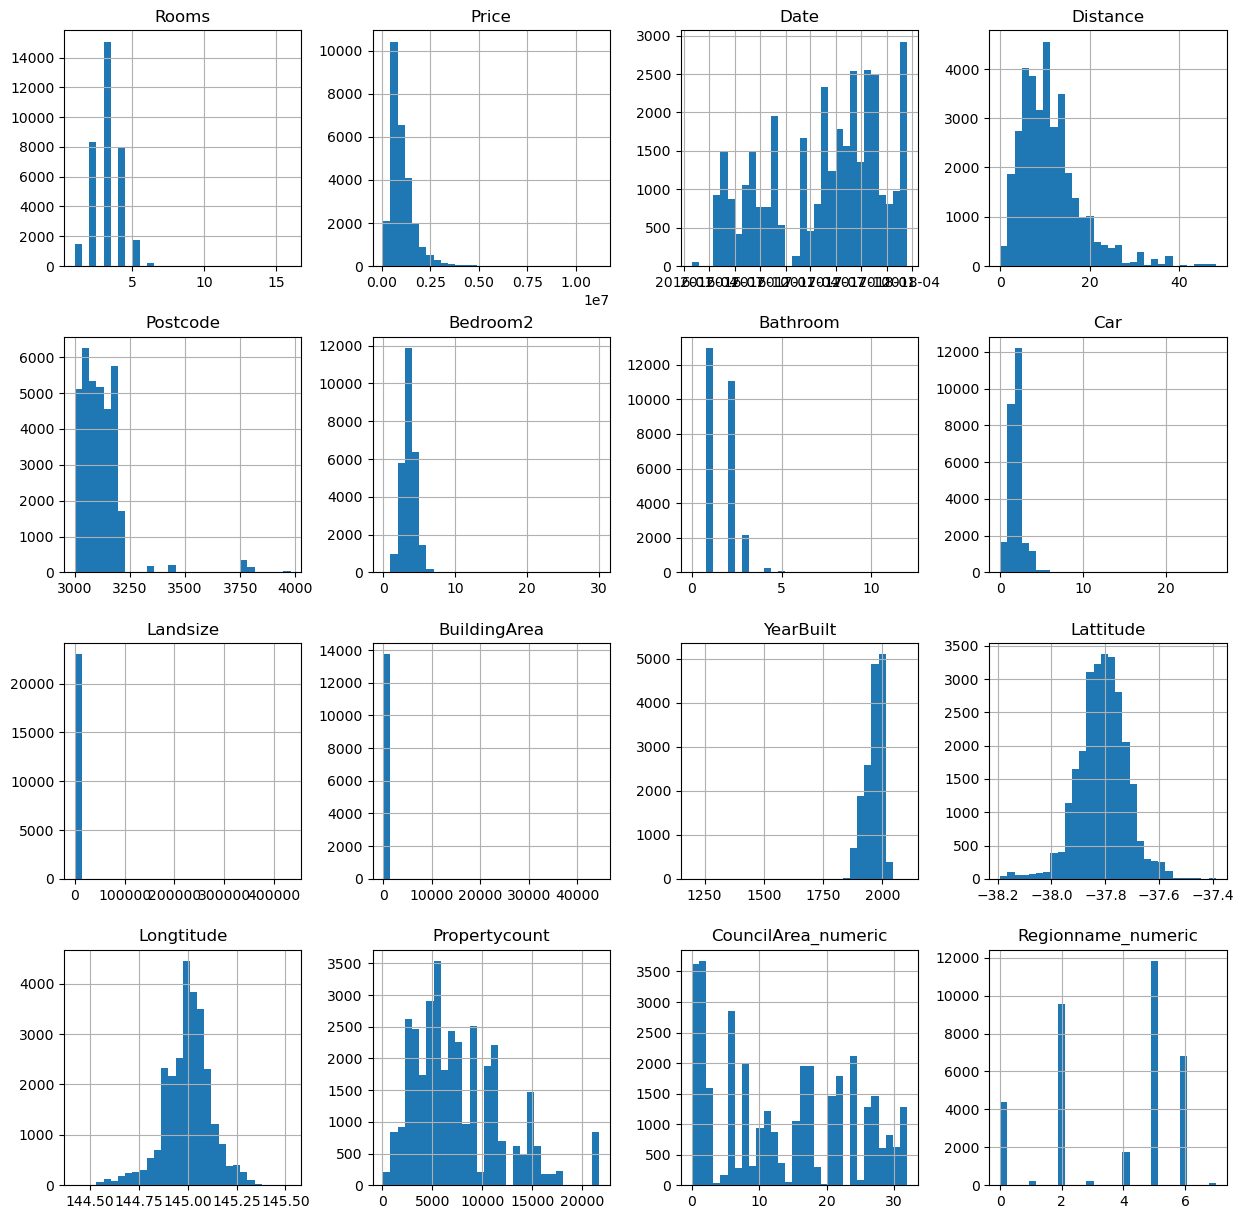

In [665]:
melbourne_dataset.hist(bins=30,figsize=(15,15))

### Matriz de correlacion

In [666]:
melbourne_dataset = melbourne_dataset[melbourne_dataset["Type"]=="h"]

In [667]:
melbourne_dataset.dtypes

Suburb                         object
Address                        object
Rooms                           int64
Type                           object
Price                         float64
Method                         object
SellerG                        object
Date                   datetime64[ns]
Distance                      float64
Postcode                      float64
Bedroom2                      float64
Bathroom                      float64
Car                           float64
Landsize                      float64
BuildingArea                  float64
YearBuilt                     float64
CouncilArea                    object
Lattitude                     float64
Longtitude                    float64
Regionname                     object
Propertycount                 float64
CouncilArea_numeric           float64
Regionname_numeric            float64
dtype: object

In [668]:
melbourne_dataset_droped_strings = melbourne_dataset.copy()
drop_col = ["Suburb","Address","Regionname","CouncilArea","SellerG","Method","Type"]
for col in drop_col:
    melbourne_dataset_droped_strings = melbourne_dataset_droped_strings.drop([col],axis=1)
corr_matrix = melbourne_dataset_droped_strings.corr()
corr_matrix

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,CouncilArea_numeric,Regionname_numeric
Rooms,1.000000,0.318045,0.072691,0.153622,0.087980,0.922920,0.608162,0.302227,0.034242,0.128913,0.187893,-0.038916,0.114497,-0.016720,-0.091185,-0.009035
Price,0.318045,1.000000,-0.079137,-0.381498,0.012566,0.298083,0.383945,0.099694,0.025981,0.075080,-0.293182,-0.265892,0.214247,-0.039029,-0.100681,0.112485
Date,0.072691,-0.079137,1.000000,0.294207,0.133470,0.125187,0.063975,0.122260,0.023495,0.008947,0.206005,0.012316,0.051383,0.039238,0.073598,-0.104241
Distance,0.153622,-0.381498,0.294207,1.000000,0.514903,0.170186,0.082597,0.193485,0.068879,0.058115,0.480643,-0.099426,0.178340,0.040408,-0.047122,-0.142383
Postcode,0.087980,0.012566,0.133470,0.514903,1.000000,0.094036,0.127039,0.059431,0.043416,0.038030,0.141168,-0.187658,0.344997,0.022386,0.035788,-0.073265
Bedroom2,0.922920,0.298083,0.125187,0.170186,0.094036,1.000000,0.609537,0.296184,0.033627,0.126028,0.192316,-0.038036,0.116559,-0.011998,-0.084978,-0.017551
Bathroom,0.608162,0.383945,0.063975,0.082597,0.127039,0.609537,1.000000,0.253745,0.032408,0.126933,0.246768,-0.071983,0.113262,-0.012341,-0.058349,0.023204
Car,0.302227,0.099694,0.122260,0.193485,0.059431,0.296184,0.253745,1.000000,0.032769,0.083840,0.232787,-0.020660,0.038273,0.016498,-0.111453,0.031774
Landsize,0.034242,0.025981,0.023495,0.068879,0.043416,0.033627,0.032408,0.032769,1.000000,0.447785,0.082807,0.025445,-0.000713,-0.021777,-0.001196,-0.015724
BuildingArea,0.128913,0.075080,0.008947,0.058115,0.038030,0.126028,0.126933,0.083840,0.447785,1.000000,0.192845,0.016726,-0.005809,-0.016698,-0.024003,0.002805


In [669]:
from sklearn.preprocessing import OrdinalEncoder

#Seleccionar las columnas que no son ni in ni floats
melbourne_dataset_droped_strings.dtypes


ordina_encoder = OrdinalEncoder()
# for i in melbourne_dataset_droped_strings.columns:
melbourne_dataset_droped_strings['Date'] = ordina_encoder.fit_transform(melbourne_dataset_droped_strings[['Date']])


## BoxPlots

In [670]:
#Hacer un for que vaya recorriendo cada columna excepto la de quality
# fig, (axs) = plt.subplots(nrows=6, ncols=2, figsize=(15, 40))
# for icol, col in enumerate(melbourne_dataset.columns):
#     axs_col = icol//6
#     axs_fila = icol % 6
#     data_plot = []
#     if col != "quality":
#         #Conseguir los datos para pasarselo al boxplot, clasificando cada valor de la columna con la columna de calidad
#         for i in sorted(melbourne_dataset['quality'].unique()):
#             data_plot.append(melbourne_dataset[melbourne_dataset["quality"] == i][col])
            
#         axs[axs_fila][axs_col].boxplot(data_plot, labels=sorted(melbourne_dataset['quality'].unique()),notch=True,patch_artist=True,
#                     showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
#                     medianprops=dict(color='deeppink'),
#                     flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
#                     boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
#                     capprops=dict(color='deeppink', linewidth=2)
#                     )
#         axs[axs_fila][axs_col].set_xlabel('Quality')
#         axs[axs_fila][axs_col].set_ylabel(f'{col}')
#         axs[axs_fila][axs_col].set_title(f'Boxplot Quality/ {col}')

## Mapa de calor

Text(0, 0.5, 'Color bar')

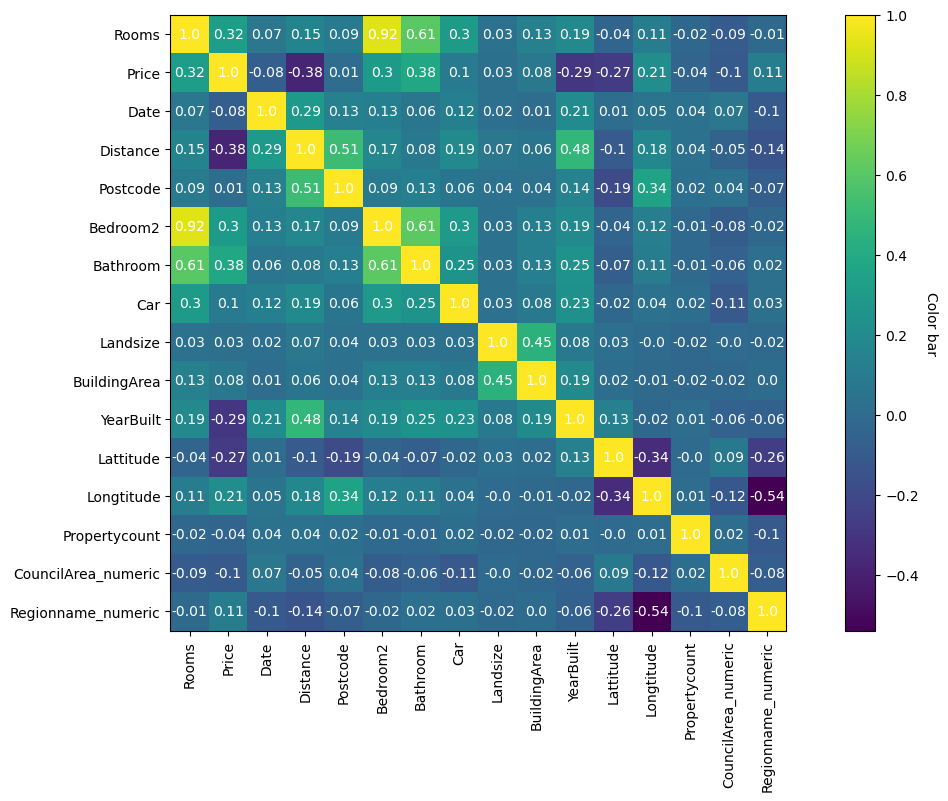

In [671]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

## Entrenamiento del modelo

In [672]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#Funcion para hacer divisiones de nuestro dataset
def split_train_test(data, test_ratio):
  indices = np.random.permutation(len(data))
  lg_test = int(len(data) * test_ratio)
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]
  return data.iloc[train_indices], data.iloc[test_indices]

#Mostrar datos sobre las predicciones del modelo
def predictions(x,y,model):
  predicciones = model.predict(x)
  mse = mean_squared_error(y, predicciones)
  mse = np.sqrt(mse)
  mae = mean_absolute_error(y, predicciones)
  score = r2_score(y, predicciones)
  print(f"mae: {mae}  rmse: {mse}  r2_score: {score}")

#Mostrar la puntuacion de los datos generados por el modelo
def get_scores_media_desviacion(model,x,y):
  lin_score = cross_val_score(model, x, y, scoring = "neg_mean_squared_error", cv=10)
  root_lin_score = np.sqrt(-lin_score)
  print("Scores: ", root_lin_score)
  print("Media: ", root_lin_score.mean())
  print("Desviación Std", root_lin_score.std())

np.random.seed(42)

datos_train, datos_test = split_train_test(melbourne_dataset, 0.2)
len(datos_train), len(datos_test)

(19184, 4796)

## Corregir los valores nulos
Primero eliminaremos las filas que contengan mayoritariamente valores nulos

Despues sustituiremos los valores nulos utilizando el SimpleImputer

### Corregir los datos nulos con Imputacion

In [816]:
clean_melbourne_df = melbourne_dataset_droped_strings.copy()
clean_melbourne_df.dropna(subset=["Price"], inplace=True)
clean_melbourne_df

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,CouncilArea_numeric,Regionname_numeric
1,2,1480000.0,29.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,31.0,2.0
2,2,1035000.0,1.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,31.0,2.0
4,3,1465000.0,33.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,31.0,2.0
5,3,850000.0,33.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0,31.0,2.0
6,4,1600000.0,8.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,74.0,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,144.88516,6543.0,16.0,6.0
34852,4,1480000.0,74.0,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,16.0,6.0
34853,2,888000.0,74.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,16.0,6.0
34855,3,1140000.0,74.0,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,16.0,6.0


In [817]:
#Eliminamos las filas que tengan columnas con mas de 6 valores nulos

clean_melbourne_df = clean_melbourne_df[clean_melbourne_df.isna().sum(axis=1) < 6]

In [818]:
clean_melbourne_df
# 15735 filas

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,CouncilArea_numeric,Regionname_numeric
1,2,1480000.0,29.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,31.0,2.0
2,2,1035000.0,1.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,31.0,2.0
4,3,1465000.0,33.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,31.0,2.0
5,3,850000.0,33.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0,31.0,2.0
6,4,1600000.0,8.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,3,570000.0,74.0,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,-37.61031,145.03393,2940.0,29.0,2.0
34851,3,1101000.0,74.0,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,144.88516,6543.0,16.0,6.0
34852,4,1480000.0,74.0,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,16.0,6.0
34853,2,888000.0,74.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,16.0,6.0


In [819]:
#Eliminamos los outliers
def remove_outliers(columns,df):
    df2 = df.dropna(subset=columns)

    for j in columns:
        q1 = df2[j].quantile(0.01)
        q3 = df2[j].quantile(0.99)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 +1.5 * iqr
        med=- np.median(df2[j])
        for i in df[j]:
            if i > Upper_tail or i < Lower_tail:
                df[j] = df[j].replace(i, med)
    return df

clean_melbourne_df = remove_outliers([col for col in clean_melbourne_df.columns if clean_melbourne_df[col].dtype in ["float64","int64"]],clean_melbourne_df)

C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_9736\1111905539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = df[j].replace(i, med)
C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_9736\1111905539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = df[j].replace(i, med)
C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_9736\1111905539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [820]:
# Utilizando ya un sistema de entrenamiento
from sklearn.model_selection import train_test_split
np.random.seed(42)


y = clean_melbourne_df["Price"].copy()
x = clean_melbourne_df[["Longtitude","Lattitude", "YearBuilt", "Bathroom", "Bedroom2", "Distance", "Rooms", "Car","CouncilArea_numeric", "Date","Regionname_numeric"]]

x_train, x_test, y_train, y_test = train_test_split(clean_melbourne_df.drop(["Price"],axis=1), y, test_size=0.2)

In [821]:
from sklearn.impute import SimpleImputer

# make copy to avoid changing original data (when Imputing)


# make new columns indicating what will be imputed
cols_with_missing = [col for col in clean_melbourne_df.columns 
                                 if clean_melbourne_df[col].isnull().any() and col != "Price"]


# Imputation
# my_imputer = SimpleImputer()
# my_imputer.fit(new_data[cols_with_missing])
# new_data[cols_with_missing] = my_imputer.transform(new_data[cols_with_missing])

#Rellenamos los valores nulos por separado para no engañar al modelo
x_train =SimpleImputer(strategy="most_frequent").fit_transform(x_train)
x_test =SimpleImputer(strategy="most_frequent").fit_transform(x_test)

#new_data.columns = melbourne_dataset_droped_strings.columns

In [822]:
# my_imputer.statistics_

In [823]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34849     570000.0
34851    1101000.0
34852    1480000.0
34853     888000.0
34856    1020000.0
Name: Price, Length: 15735, dtype: float64

### Modelo de Regresion Linear

In [824]:
# Utilizando el modelo de Regresion Linear
# from sklearn.linear_model import LinearRegression

# #Creamos el modelo
# lin_reg = LinearRegression()
# #Entrenamos el modelo
# lin_reg.fit(x_train,y_train)
# #Sacamos las predicciones del modelo
# predictions(x_train,y_train,lin_reg)
# # cross-validation lineal
# get_scores_media_desviacion(lin_reg,x_train,y_train)

### Modelo de Arbol de Regresion

In [825]:
# Modelo de Regresión de Arbol de Decision
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor()
# tree_reg.fit(x_train, y_train)

# #Sacamos las predicciones del modelo
# predictions(x_train,y_train,tree_reg)

# # NO SE DEBERÍA UTILIZAR TODAVÍA LOS DATOS DE TEST
# # Predicciones de DecisionTreeRegressor con datos de test
# predictions(x_test,y_test,tree_reg)
# # cross-validation arbol decision
# get_scores_media_desviacion(tree_reg,x_train,y_train)

### Modelo de Random Forest

In [826]:
# regresión random forest
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(n_estimators=100)

# rf_reg.fit(x_train, y_train)

# predictions(x_test,y_test,rf_reg)

# get_scores_media_desviacion(rf_reg,x_train,y_train)

### Modelo de SVR 

In [827]:
# regresión SVM
# from sklearn.svm import SVR

# sv_reg = SVR()

# sv_reg.fit(x_train, y_train)

# predictions(x_test,y_test,sv_reg)

# get_scores_media_desviacion(sv_reg,x_train,y_train)

### Modelo XGBoost

In [828]:
# regresión xgboost
import xgboost as xgb

# xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")
xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(x_train, y_train)

predictions(x_test,y_test,xgb_reg)

get_scores_media_desviacion(xgb_reg,x_train,y_train)

# 0.7478570116602984 
# 0.7735578525118039 eliminando outliers y filas na
# 0.8061549436296116 cambiando eliminacion de outiers
# 0.8061846282880163 añadiendo 2 columnas de string to numeric

mae: 179997.61854047506  rmse: 293056.048374111  r2_score: 0.8061846282880163
Scores:  [303754.58841773 309159.5583453  296698.62811748 291752.18230487
 273290.12947427 305634.20520675 299257.82210236 264859.19668905
 336756.72833806 310061.11891793]
Media:  299122.4157913793
Desviación Std 18979.172756094413
